# World of Warcraft Battleground Data Analysis

World of Warcraft is a MMORPG game that was created by Blizzard Entertainment. The game contained many content. One of the most popular game mode is Battleground. This game mode assembles 10 to 40 people (Depend on the map) from each faction (Alliance/Horde) and compete against each other. 

In this project, we will be analyzing a World of Warcraft Battleground dataset that we found on Kaggle. The link to the dataset is linked below. 

Our final goal for this project is to predict win or lose for a given player. 


https://www.kaggle.com/cblesa/world-of-warcraft-battlegrounds

## EDA

##### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../data/wowbgs.csv')
df

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,WG,WG35,Alliance,Druid,18,1,52,123000,49511,615,1.0,NaN,dps,NaN
3722,WG,WG35,Alliance,Monk,0,4,33,13087,9057,555,1.0,NaN,dps,NaN
3723,WG,WG35,Horde,Hunter,2,5,28,57365,6837,193,NaN,1.0,dps,NaN
3724,WG,WG35,Alliance,Death Knight,2,5,41,44997,40934,581,1.0,NaN,dps,NaN


In [4]:
# Get the shape of the data
df.shape

(3726, 14)

#### Column analysis

First of all, I would like to take a look at our target varible. Notice that we have a win column filled with 1 when a player won and lose column filled with a 1 if a player lose. Will will take win as our target varible. I will also check these two columns and make sure we are getting the same information from these two columns.

1.0    1889
Name: Win, dtype: int64


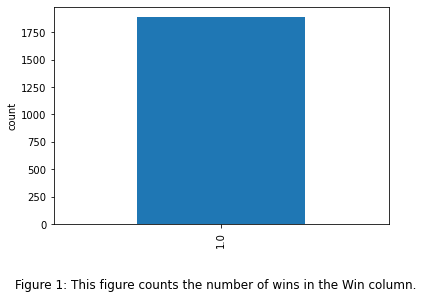

In [5]:
print(df['Win'].value_counts())
df['Win'].value_counts().plot.bar()
txt = '''Figure 1: This figure counts the number of wins in the Win column.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.ylabel('count')
plt.show()

1.0    1837
Name: Lose, dtype: int64


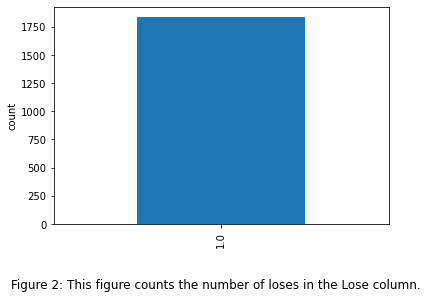

In [6]:
print(df['Lose'].value_counts())
df['Lose'].value_counts().plot.bar()
txt = '''Figure 2: This figure counts the number of loses in the Lose column.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.ylabel('count')
plt.show()

In [7]:
# We are checking if these two columns added together have the same shape as the dataframe

df.shape[0] == df['Win'].value_counts()[1] + df['Lose'].value_counts()[1]

True

In [8]:
# From other basic analysis above and from the data's author's description, we know that there are only win or lose for each game.
# We will combine them together to form a new 'Win' column as our target variable
# We will also drop 'Code' since the author did not give a clear description and neither used it for analysis
# We need to drop 'Honor' column since it exposes some information about the target variable
df.drop(columns = ['Code', 'Lose', 'Honor'], inplace = True)
df['Win'] = df['Win'].replace(np.nan,0)
print(df.shape)
print(df.head())

(3726, 11)
  Battleground   Faction         Class  KB  D  HK     DD     HD  Win   Rol  BE
0           WG     Horde        Hunter   1  3  14  48155   6641  1.0   dps NaN
1           WG     Horde  Death Knight   1  3  12  27025   7106  1.0   dps NaN
2           WG  Alliance       Paladin   0  1  19    824  93879  0.0  heal NaN
3           WG  Alliance       Paladin   1  2  25   7046  98599  0.0  heal NaN
4           WG  Alliance         Rogue   2  3  23  65483  19629  0.0   dps NaN


Win is our target variable for this project.

count    3726.000000
mean        0.506978
std         0.500018
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Win, dtype: float64


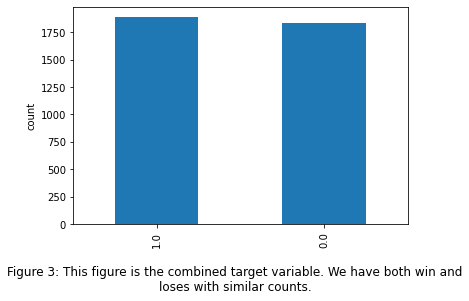

In [9]:
print(df['Win'].describe())
df['Win'].value_counts().plot.bar()
txt = '''Figure 3: This figure is the combined target variable. We have both win and
loses with similar counts.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.ylabel('count')
plt.show()

count     3726
unique       9
top         WG
freq       687
Name: Battleground, dtype: object


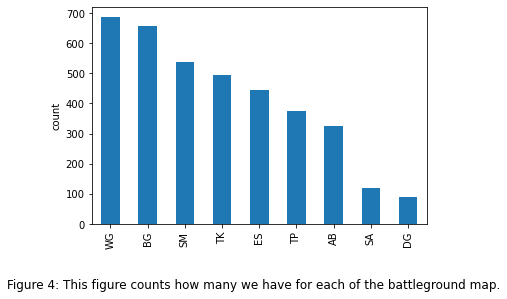

Win                0.0       1.0
Battleground                    
AB            0.493865  0.506135
BG            0.484018  0.515982
DG            0.494382  0.505618
ES            0.494357  0.505643
SA            0.508475  0.491525
SM            0.498134  0.501866
TK            0.493927  0.506073
TP            0.494681  0.505319
WG            0.491994  0.508006


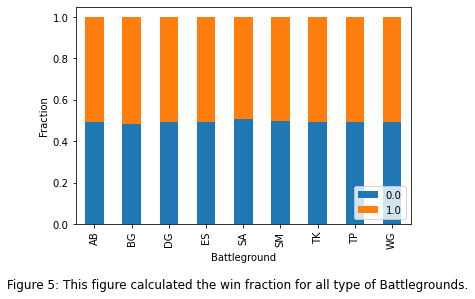

In [10]:
print(df['Battleground'].describe())
df['Battleground'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 4: This figure counts how many we have for each of the battleground map.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count_matrix = df.groupby(['Battleground', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction')
plt.legend(loc=4)
txt = '''Figure 5: This figure calculated the win fraction for all type of Battlegrounds.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.savefig("../figures/bg_win.png", bbox_inches = 'tight')
plt.show()

This column gives us the distribution of different battleground. 

count      3726
unique        2
top       Horde
freq       1875
Name: Faction, dtype: object


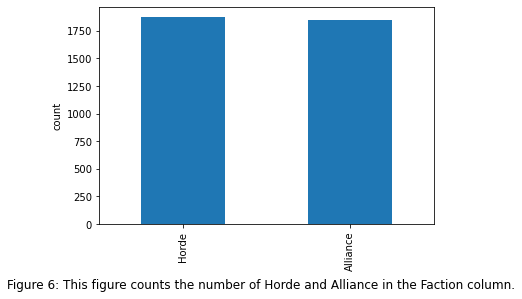

In [11]:
print(df['Faction'].describe())
df['Faction'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 6: This figure counts the number of Horde and Alliance in the Faction column.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

Win            0.0       1.0
Faction                     
Alliance  0.651540  0.348460
Horde     0.336533  0.663467


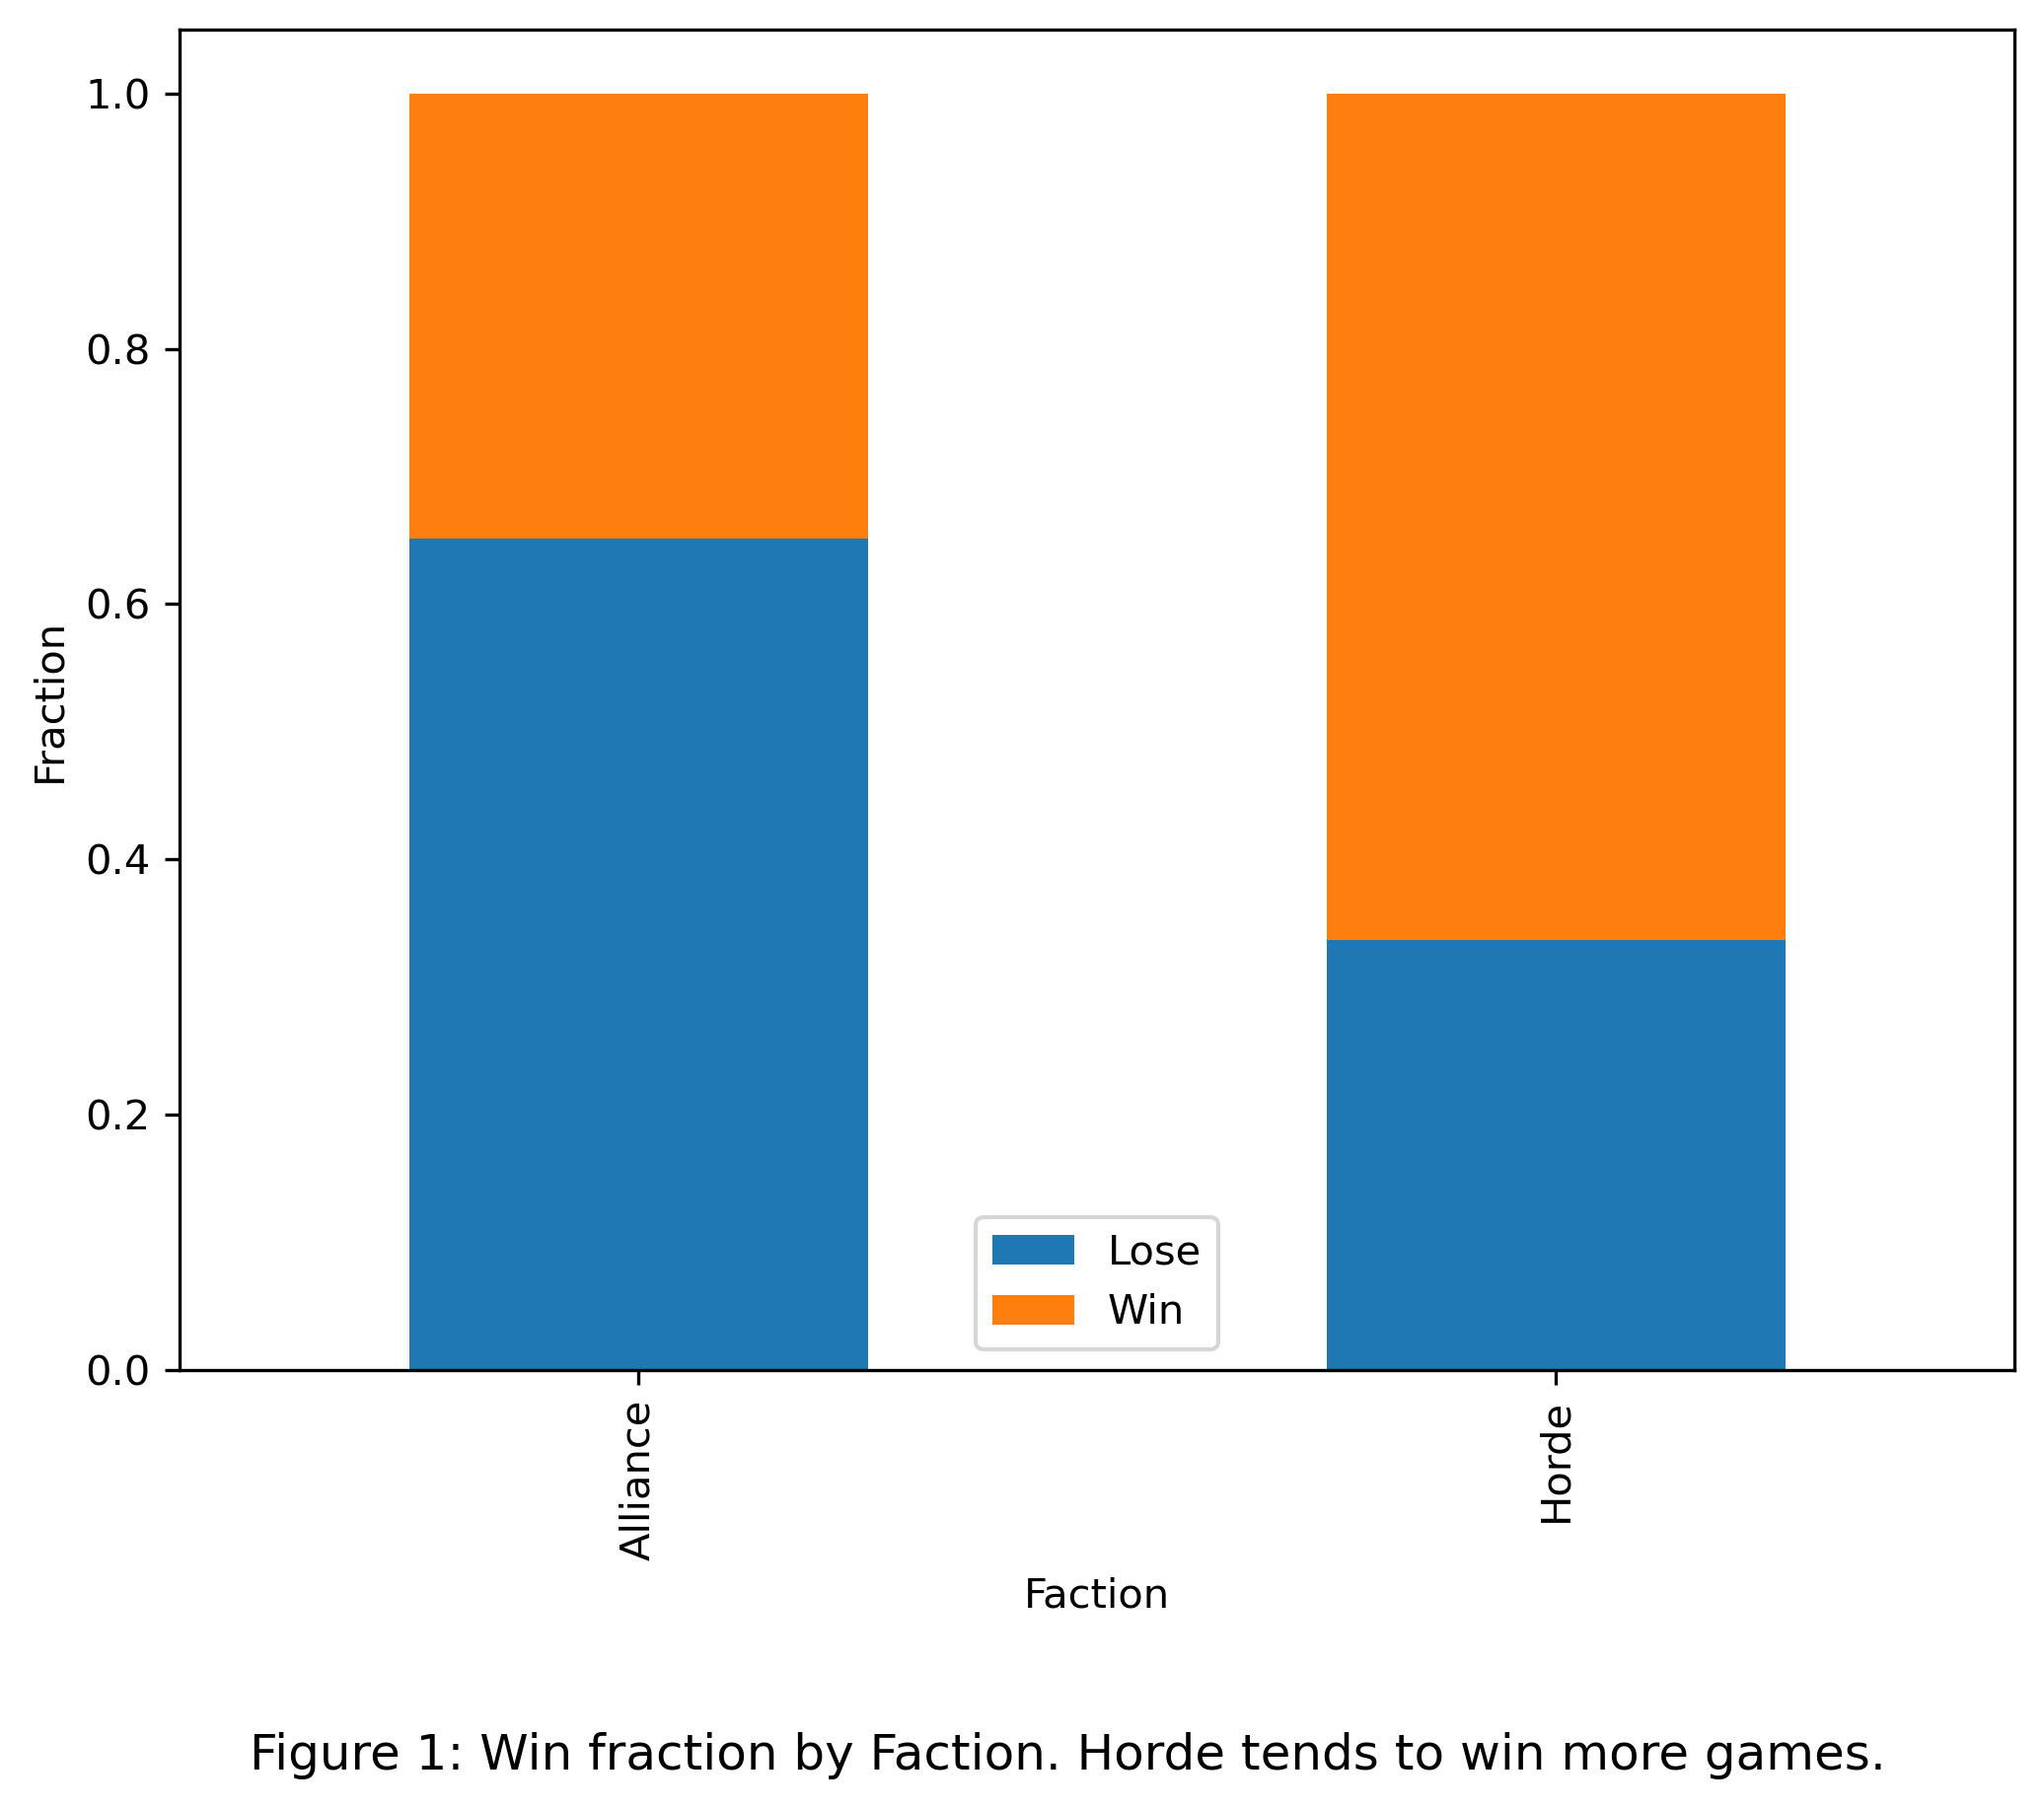

In [12]:
count_matrix = df.groupby(['Faction', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
txt = '''Figure 1: Win fraction by Faction. Horde tends to win more games.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.ylabel('Fraction')
l = plt.legend()
l.get_texts()[0].set_text('Lose')
l.get_texts()[1].set_text('Win')
plt.gcf().set_size_inches(8, 6)
plt.gcf().set_dpi(300)
plt.savefig("../figures/faction_win.png", bbox_inches = 'tight')
plt.show()

count       3726
unique        12
top       Shaman
freq         396
Name: Class, dtype: object


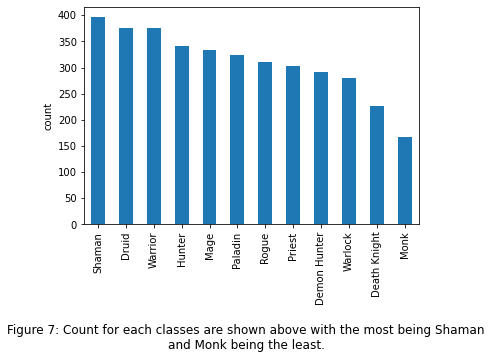

Win                0.0       1.0
Class                           
Death Knight  0.444934  0.555066
Demon Hunter  0.479452  0.520548
Druid         0.518617  0.481383
Hunter        0.571848  0.428152
Mage          0.532934  0.467066
Monk          0.497006  0.502994
Paladin       0.490741  0.509259
Priest        0.485149  0.514851
Rogue         0.451613  0.548387
Shaman        0.424242  0.575758
Warlock       0.500000  0.500000
Warrior       0.507979  0.492021


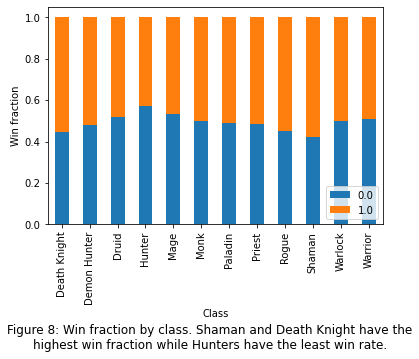

In [13]:
print(df['Class'].describe())
df['Class'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 7: Count for each classes are shown above with the most being Shaman
and Monk being the least.'''
plt.figtext(0.5, -0.3, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count_matrix = df.groupby(['Class', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Win fraction')
plt.legend(loc=4)
txt = '''Figure 8: Win fraction by class. Shaman and Death Knight have the
highest win fraction while Hunters have the least win rate.'''
plt.figtext(0.5, -0.3, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.savefig("../figures/class_win.png", bbox_inches = 'tight')
plt.show()

count    3726.000000
mean        3.015835
std         3.141498
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        23.000000
Name: KB, dtype: float64


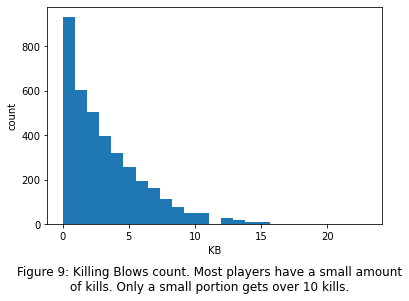

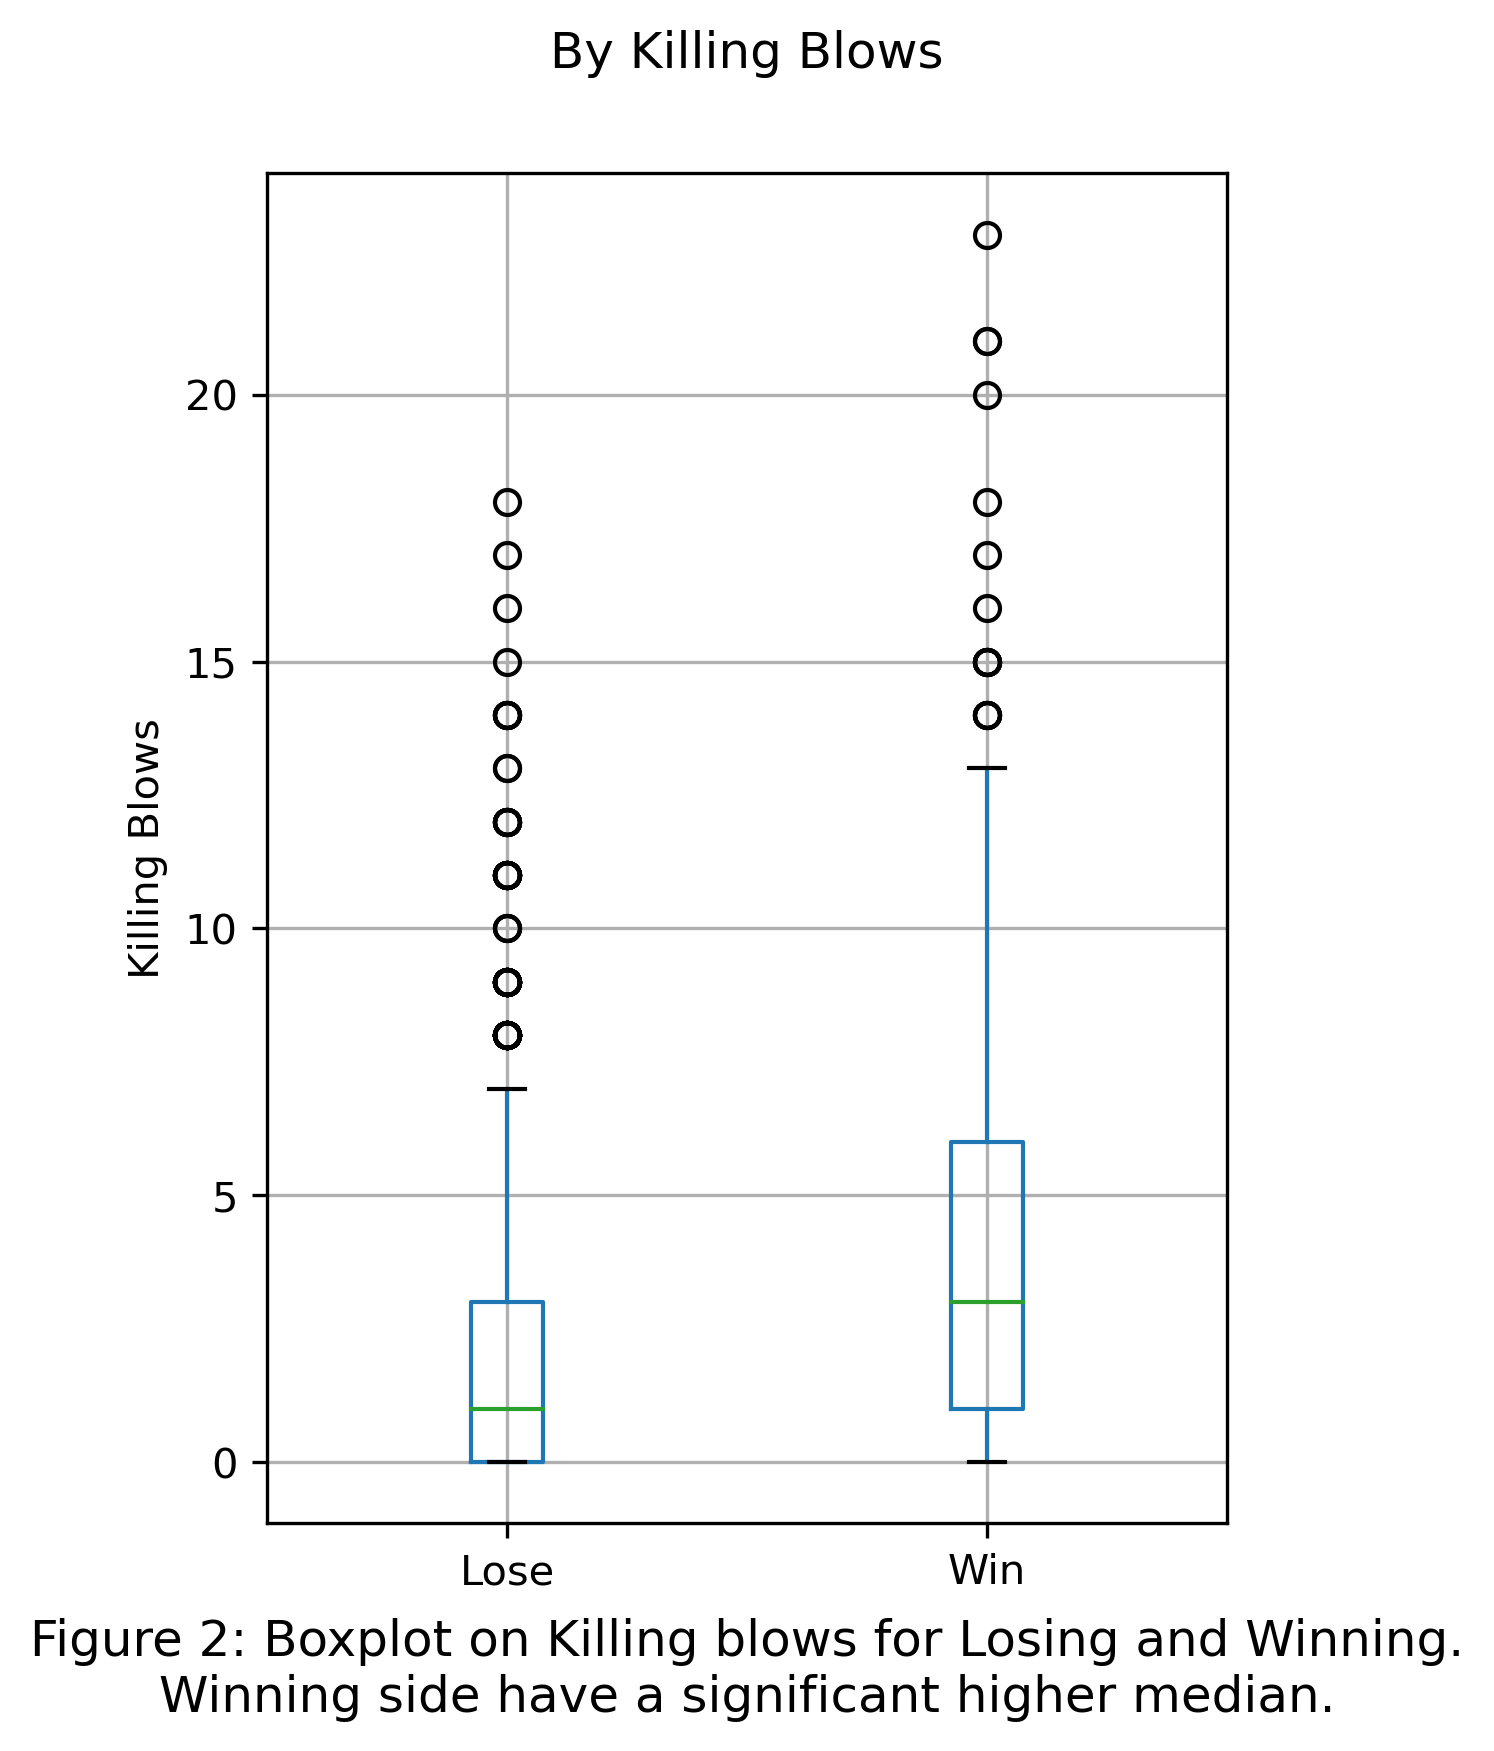

In [14]:
print(df['KB'].describe())
df['KB'].plot.hist(bins = 25)
plt.xlabel('KB')
plt.ylabel('count')
txt = '''Figure 9: Killing Blows count. Most players have a small amount
of kills. Only a small portion gets over 10 kills.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'KB': df['KB'], 'Win': df['Win']})
temp_df.boxplot(by='Win')

txt = '''Figure 2: Boxplot on Killing blows for Losing and Winning.
Winning side have a significant higher median.'''
plt.xticks([1,2], ["Lose", "Win"])
plt.title('')
plt.xlabel('')
plt.ylabel('Killing Blows')
plt.suptitle('By Killing Blows')
plt.figtext(0.5, 0.05, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.gcf().set_size_inches(4, 6)
plt.gcf().set_dpi(300)
plt.savefig("../figures/KB_box.png", bbox_inches = 'tight')
plt.show()

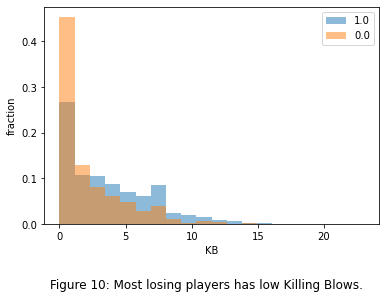

In [15]:
categories = df['Win'].unique()
bin_range = (df['KB'].min(),df['KB'].max())

for c in categories:
    plt.hist(df[df['Win']==c]['KB'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('KB')
txt = '''Figure 10: Most losing players has low Killing Blows.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.savefig("../figures/KB_win.png", bbox_inches = 'tight')
plt.show()

count    3726.000000
mean        3.025497
std         2.209958
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: D, dtype: float64


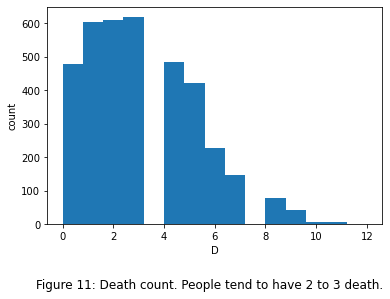

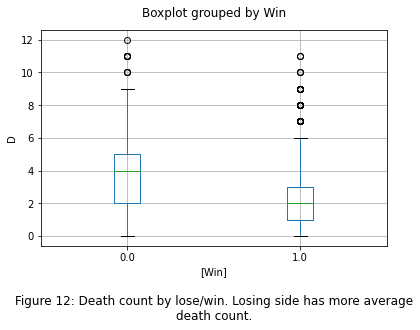

In [16]:
print(df['D'].describe())
df['D'].plot.hist(bins = 15)
plt.xlabel('D')
plt.ylabel('count')
txt = '''Figure 11: Death count. People tend to have 2 to 3 death.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'D': df['D'], 'Win': df['Win']})
temp_df.boxplot(by='Win')
plt.title('')
plt.ylabel('D')
txt = '''Figure 12: Death count by lose/win. Losing side has more average
death count.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count    3726.000000
mean       26.420558
std        15.989997
min         0.000000
25%        14.000000
50%        25.000000
75%        38.000000
max        95.000000
Name: HK, dtype: float64


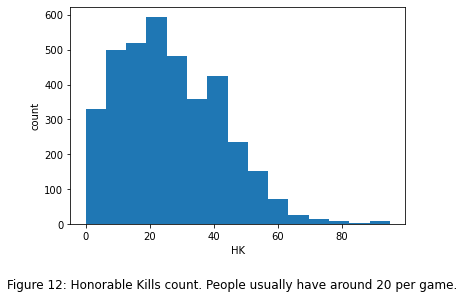

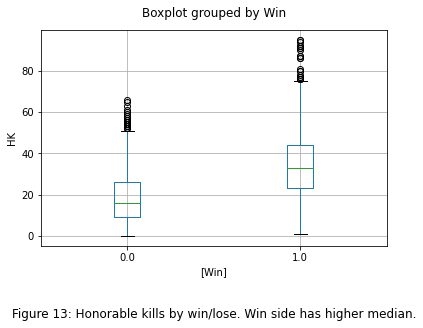

In [17]:
print(df['HK'].describe())
df['HK'].plot.hist(bins = 15)
plt.xlabel('HK')
plt.ylabel('count')
txt = '''Figure 12: Honorable Kills count. People usually have around 20 per game.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'HK': df['HK'], 'Win': df['Win']})
temp_df.boxplot(by='Win')
plt.title('')
plt.ylabel('HK')
txt = '''Figure 13: Honorable kills by win/lose. Win side has higher median.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count      3726.000000
mean      41215.037842
std       33193.413617
min           0.000000
25%       15490.500000
50%       34107.500000
75%       58958.000000
max      246000.000000
Name: DD, dtype: float64


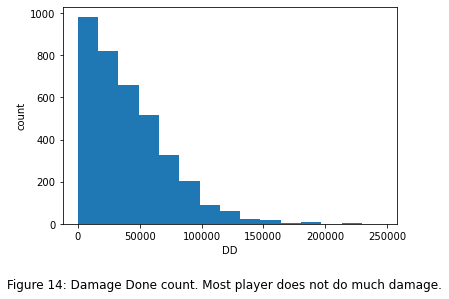

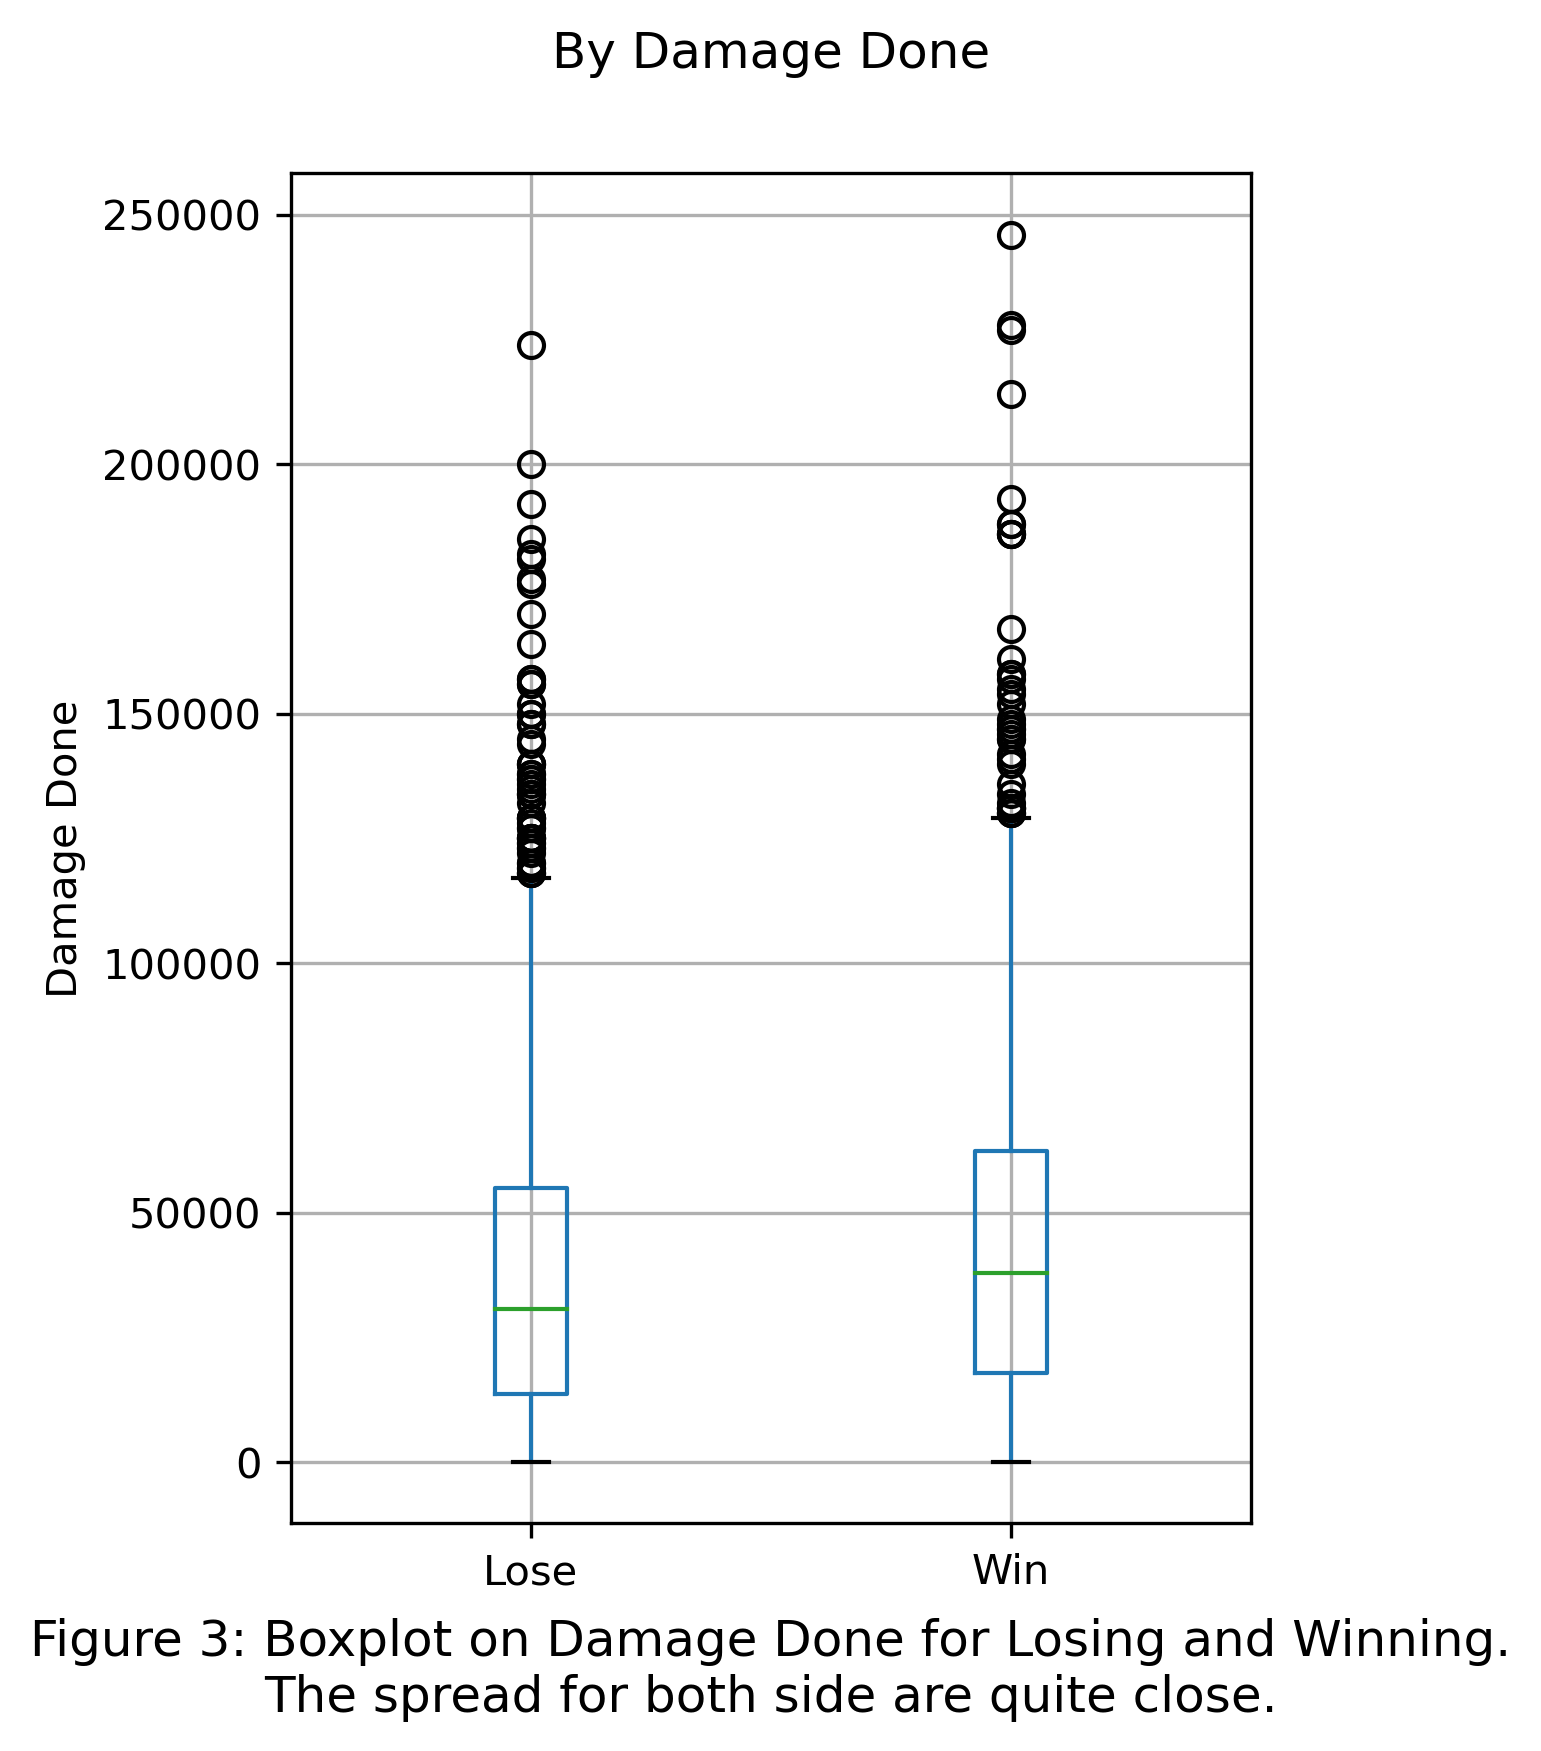

In [18]:
print(df['DD'].describe())
df['DD'].plot.hist(bins = 15)
plt.xlabel('DD')
plt.ylabel('count')
txt = '''Figure 14: Damage Done count. Most player does not do much damage.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'DD': df['DD'], 'Win': df['Win']})
temp_df.boxplot(by='Win')

txt = '''Figure 3: Boxplot on Damage Done for Losing and Winning.
The spread for both side are quite close.'''
plt.xticks([1,2], ["Lose", "Win"])
plt.title('')
plt.xlabel('')
plt.ylabel('Damage Done')
plt.suptitle('By Damage Done')
plt.figtext(0.5, 0.05, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.gcf().set_size_inches(4, 6)
plt.gcf().set_dpi(300)
plt.savefig("../figures/DD_box.png", bbox_inches = 'tight')
plt.show()

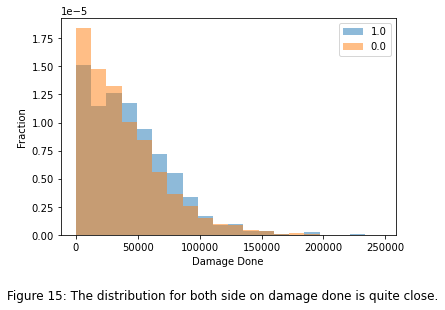

In [19]:
categories = df['Win'].unique()
bin_range = (df['DD'].min(),df['DD'].max())

for c in categories:
    plt.hist(df[df['Win']==c]['DD'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('Fraction')
plt.xlabel('Damage Done')
txt = '''Figure 15: The distribution for both side on damage done is quite close.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.savefig("../figures/DD_win.png", bbox_inches = 'tight')
plt.show()

count      3726.000000
mean      26426.688674
std       37583.736064
min           0.000000
25%        5919.250000
50%       12070.500000
75%       26695.500000
max      325000.000000
Name: HD, dtype: float64


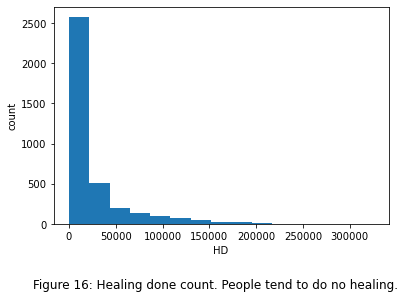

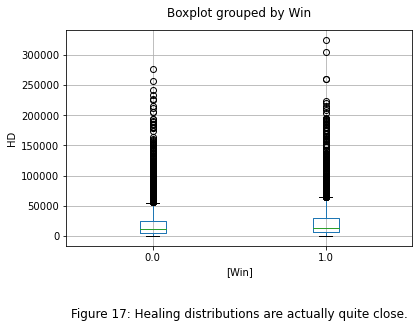

In [20]:
print(df['HD'].describe())
df['HD'].plot.hist(bins = 15)
plt.xlabel('HD')
plt.ylabel('count')
txt = '''Figure 16: Healing done count. People tend to do no healing.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

temp_df = pd.DataFrame({'HD': df['HD'], 'Win': df['Win']})
temp_df.boxplot(by='Win')
plt.title('')
plt.ylabel('HD')
txt = '''Figure 17: Healing distributions are actually quite close.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count     3726
unique       2
top        dps
freq      3000
Name: Rol, dtype: object


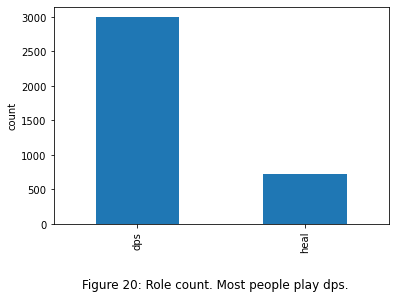

Win        0.0       1.0
Rol                     
dps   0.497667  0.502333
heal  0.473829  0.526171


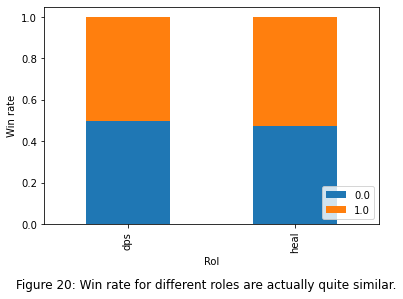

In [21]:
print(df['Rol'].describe())
df['Rol'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 20: Role count. Most people play dps.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count_matrix = df.groupby(['Rol', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Win rate')
plt.legend(loc=4)
txt = '''Figure 20: Win rate for different roles are actually quite similar.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count    529.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: BE, dtype: float64


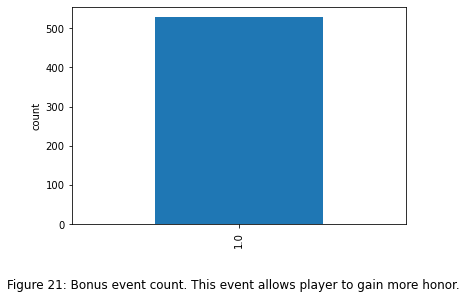

Win       0.0       1.0
BE                     
1.0  0.497164  0.502836


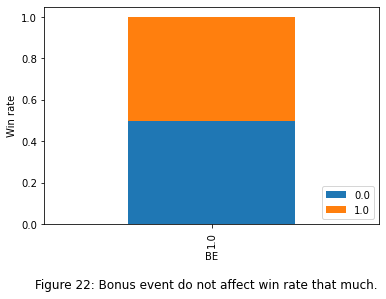

In [22]:
print(df['BE'].describe())
df['BE'].value_counts().plot.bar()
plt.ylabel('count')
txt = '''Figure 21: Bonus event count. This event allows player to gain more honor.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

count_matrix = df.groupby(['BE', 'Win']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Win rate')
plt.legend(loc=4)
txt = '''Figure 22: Bonus event do not affect win rate that much.'''
plt.figtext(0.5, -0.1, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

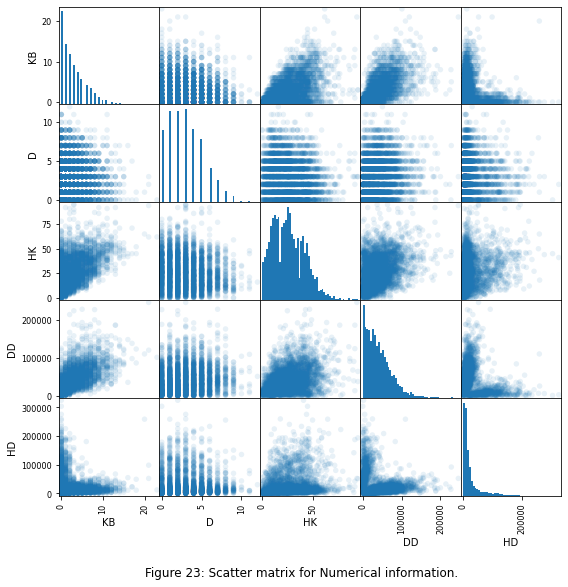

In [23]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)

txt = '''Figure 23: Scatter matrix for Numerical information.'''
plt.figtext(0.5, 0, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.show()

In [24]:
corrMatrix = df.corr()
print(corrMatrix)

           KB         D        HK        DD        HD       Win  BE
KB   1.000000 -0.075229  0.497499  0.619745 -0.226175  0.248338 NaN
D   -0.075229  1.000000 -0.135933  0.133150 -0.016778 -0.344289 NaN
HK   0.497499 -0.135933  1.000000  0.355462  0.192361  0.478220 NaN
DD   0.619745  0.133150  0.355462  1.000000 -0.208453  0.073264 NaN
HD  -0.226175 -0.016778  0.192361 -0.208453  1.000000  0.049371 NaN
Win  0.248338 -0.344289  0.478220  0.073264  0.049371  1.000000 NaN
BE        NaN       NaN       NaN       NaN       NaN       NaN NaN


In [25]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [26]:
import seaborn as sns

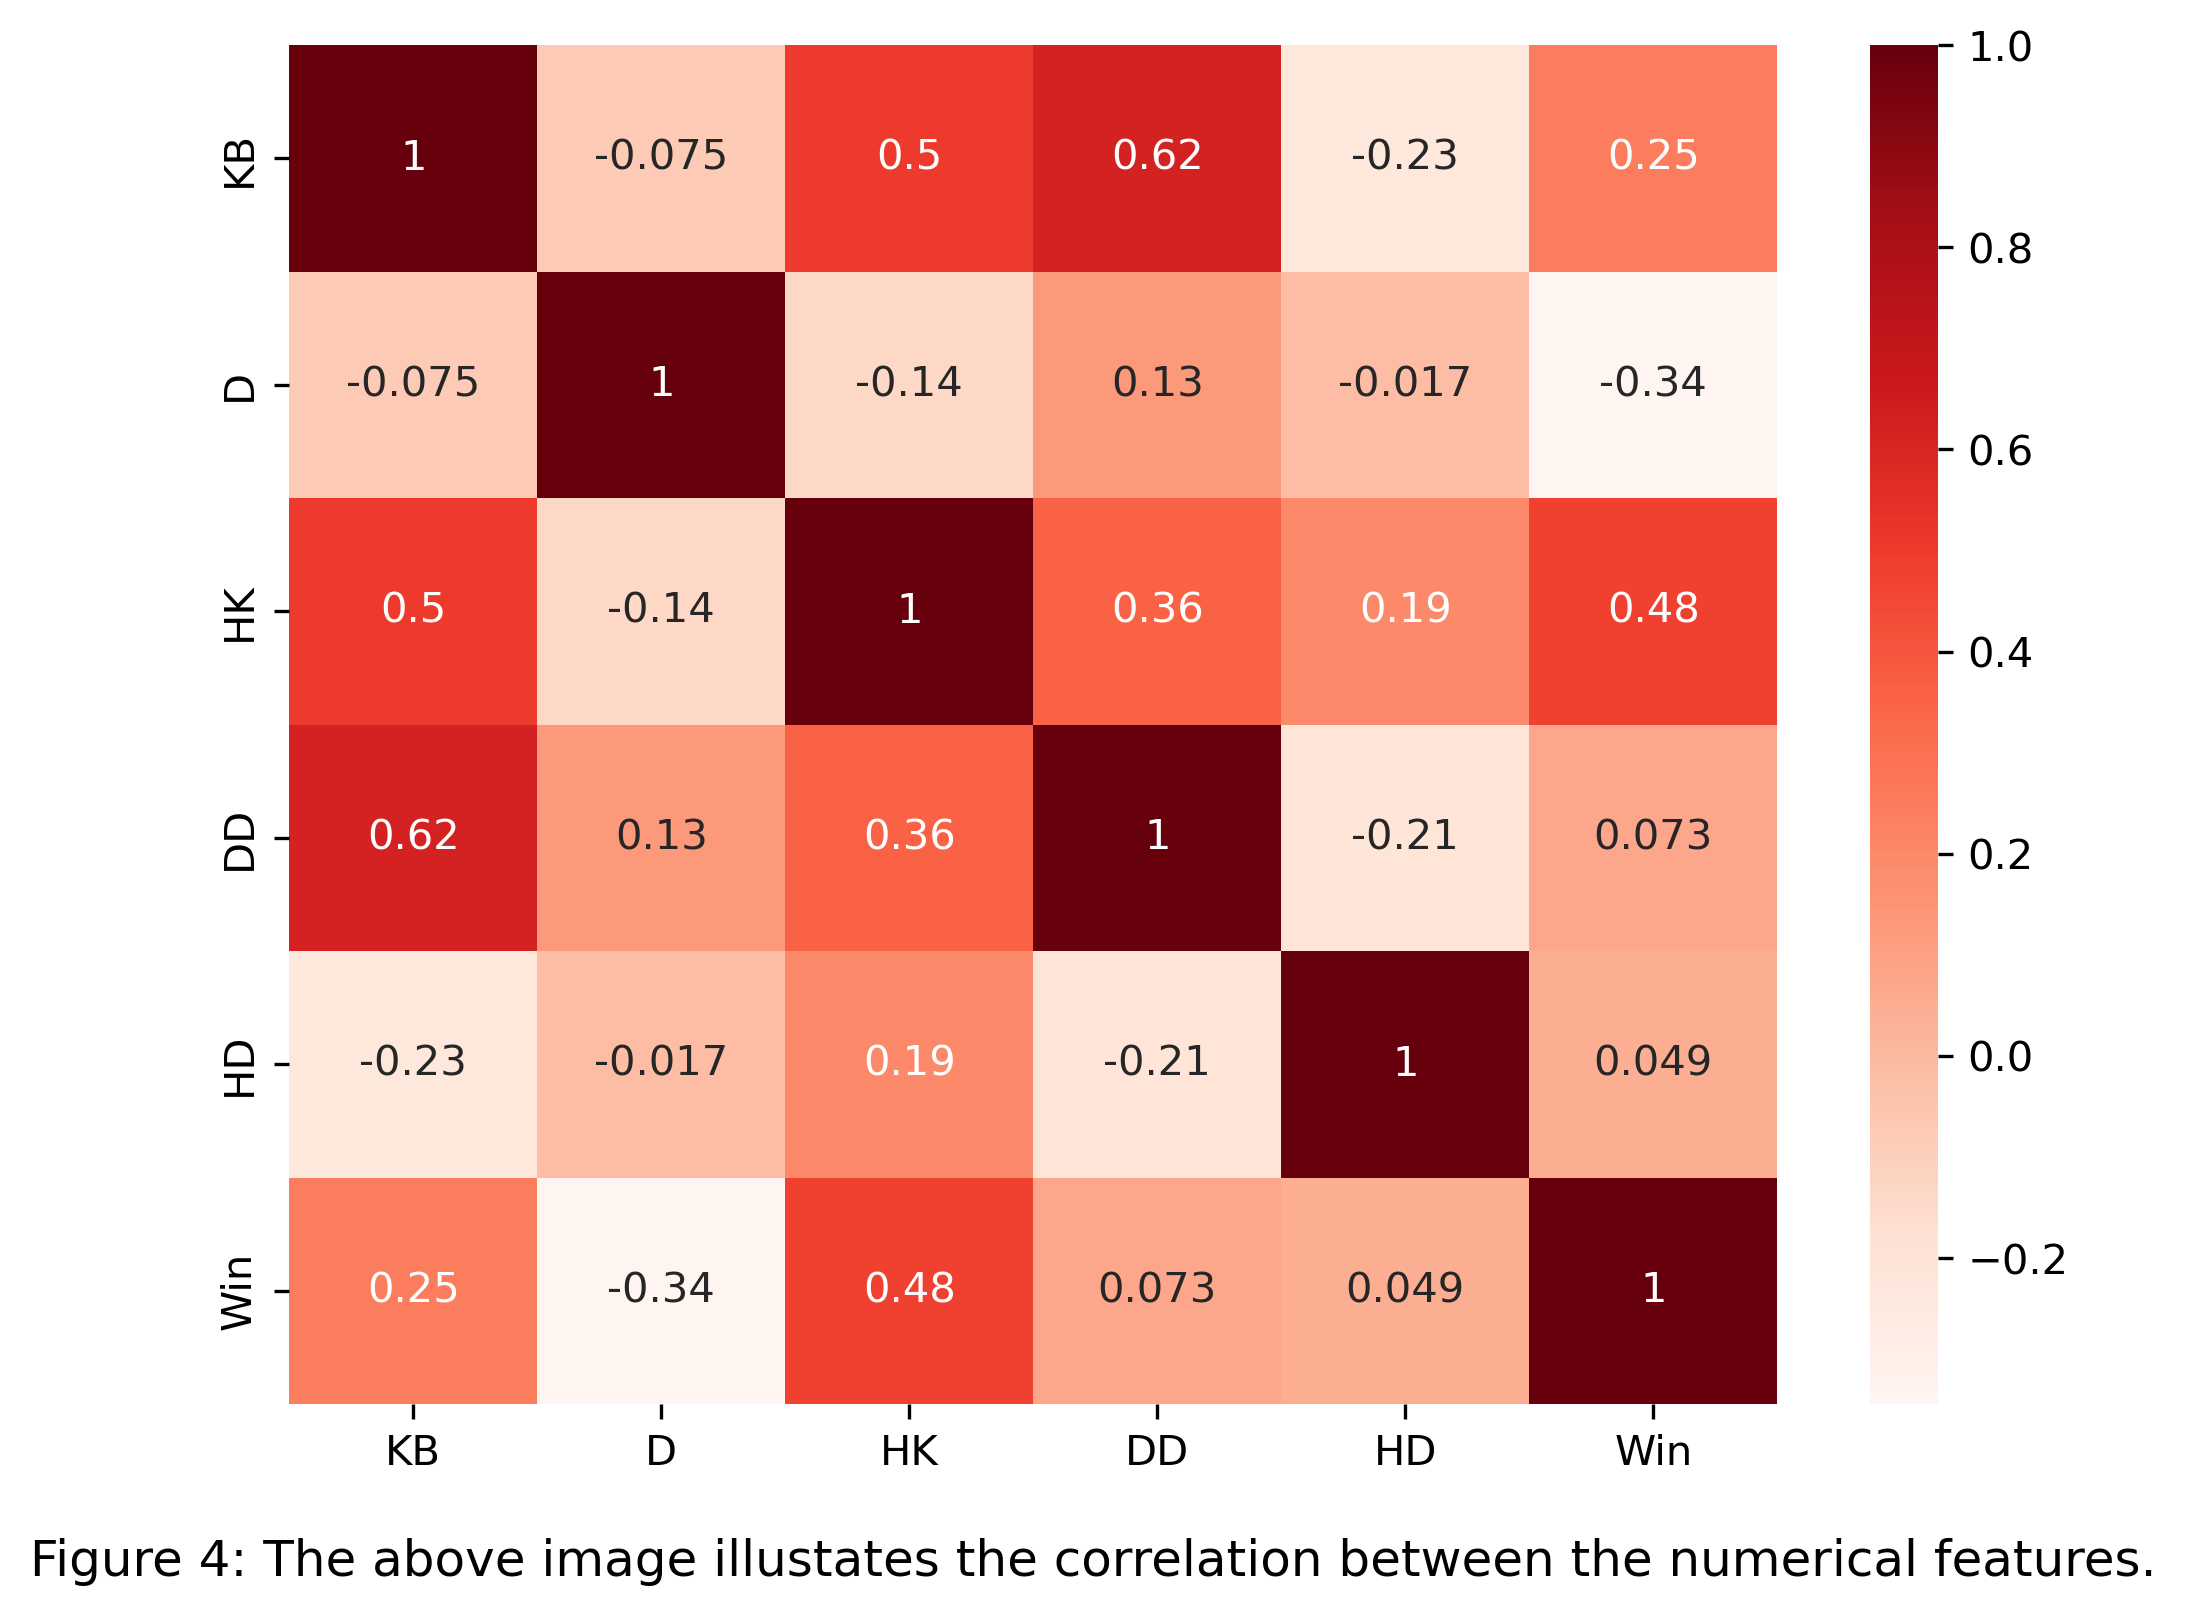

In [27]:
sns.heatmap(corrMatrix.iloc[0:6, 0:6], cmap = 'Reds', annot = True)
txt = '''Figure 4: The above image illustates the correlation between the numerical features.'''
plt.figtext(0.46, 0.03, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.gcf().set_size_inches(8, 6)
plt.gcf().set_dpi(300)
plt.savefig("../figures/feature_corr.png", bbox_inches = 'tight')
plt.show()

## Data preprocessing

Our data was collected from many players from many games. The data does not have a group structure nor a time factor involved. Therefore, the data is IID. We will use the basic train-test-split and KFOLD CV.

In [28]:
from sklearn.model_selection import train_test_split, KFold

y = df['Win']
X = df.loc[:, df.columns != 'Win']
print(y)
print(X.head())

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3721    1.0
3722    1.0
3723    0.0
3724    1.0
3725    1.0
Name: Win, Length: 3726, dtype: float64
  Battleground   Faction         Class  KB  D  HK     DD     HD   Rol  BE
0           WG     Horde        Hunter   1  3  14  48155   6641   dps NaN
1           WG     Horde  Death Knight   1  3  12  27025   7106   dps NaN
2           WG  Alliance       Paladin   0  1  19    824  93879  heal NaN
3           WG  Alliance       Paladin   1  2  25   7046  98599  heal NaN
4           WG  Alliance         Rogue   2  3  23  65483  19629   dps NaN


### Ridge Classifier

In [29]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [30]:
df

,Battleground,Faction,Class,KB,D,HK,DD,HD,Win,Rol,BE
0,WG,Horde,Hunter,1,3,14,48155,6641,1.0,dps,NaN
1,WG,Horde,Death Knight,1,3,12,27025,7106,1.0,dps,NaN
2,WG,Alliance,Paladin,0,1,19,824,93879,0.0,heal,NaN
3,WG,Alliance,Paladin,1,2,25,7046,98599,0.0,heal,NaN
4,WG,Alliance,Rogue,2,3,23,65483,19629,0.0,dps,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3721,WG,Alliance,Druid,18,1,52,123000,49511,1.0,dps,NaN
3722,WG,Alliance,Monk,0,4,33,13087,9057,1.0,dps,NaN
3723,WG,Horde,Hunter,2,5,28,57365,6837,0.0,dps,NaN
3724,WG,Alliance,Death Knight,2,5,41,44997,40934,1.0,dps,NaN


In [31]:
# collect the various features
cat_ftrs = ['Battleground', 'Faction', 'Class', 'Rol', 'BE']
num_ftrs = ['KB', 'D', 'HK', 'DD', 'HD', 'HD']

In [32]:
# one-hot encoder
# Replace the NaN with a string first!
random_state = 123

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0.0)),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,random_state=random_state)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)

(2980, 10)
(2980, 33)


In [33]:
new_features = num_ftrs + clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names(cat_ftrs).tolist()

## Modeling

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix

In [35]:
# function for training models

def MLpipe_KFold_accuracy(X, y, preprocessor, ML_algo, param_grid, n_random_states):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The roc_auc is maximized in cross-validation.
    '''
    # We are using code from class
    nr_states = n_random_states
    test_scores = np.zeros(nr_states)
    final_models = []
    for i in range(nr_states):
        # first split to separate out the test set
        # we will use kfold on other
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=123*i)

        # splitter for other
        kf = KFold(n_splits=4,shuffle=True,random_state=123*i)

        # the classifier
        clf = ML_algo # initialize the classifier

        # let's put together a pipeline
        # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
        # then it will train the ML algorithm on the training set and evaluate it on the validation set
        # it repeats this step automatically such that each fold will be an evaluation set once
        pipe = make_pipeline(preprocessor,clf)
        
        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

        # this line actually fits the model on other
        grid.fit(X_other, y_other)
        results = pd.DataFrame(grid.cv_results_)
        print('best model parameters:',grid.best_params_)
        print('validation score:',grid.best_score_)
        # save the model
        final_models.append(grid)
        # calculate and save the test score
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = accuracy_score(y_test,y_test_pred)
    return final_models, test_scores, X_test, y_test

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

random_state = 123

param_grid = {
    'logisticregression__C': np.logspace(-2,2,5)
} 
ML_algo = LogisticRegression(max_iter = 10000, random_state=random_state, verbose = 0)

In [37]:
logreg, logreg_test_scores, logreg_X_test, logreg_y_test = MLpipe_KFold_accuracy(X, y, preprocessor, ML_algo, param_grid, 10)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'logisticregression__C': 100.0}
validation score: 0.7802013422818792
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'logisticregression__C': 0.1}
validation score: 0.7885906040268457
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'logisticregression__C': 0.1}
validation score: 0.7781879194630872
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'logisticregression__C': 100.0}
validation score: 0.7882550335570471
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'logisticregression__C': 0.01}
validation score: 0.7822147651006712
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'logisticregression__C': 0.1}
validation score: 0.7785234899328859
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'logi

In [38]:
print(logreg_test_scores)
print('mean:',logreg_test_scores.mean())

[0.79758713 0.77479893 0.80965147 0.77345845 0.77077748 0.79088472
 0.76541555 0.76407507 0.74932976 0.78954424]
mean: 0.7785522788203754


In [39]:
logreg_test_scores.mean()

0.7785522788203754

### Ridge Classifier

In [40]:
from sklearn.linear_model import RidgeClassifier
param_grid = {
    'ridgeclassifier__alpha': np.logspace(-2,2,5)
} 
ML_algo = RidgeClassifier(max_iter = 10000, random_state=random_state)

In [41]:
ridgeC, ridgeC_test_scores, ridgeC_X_test, ridgeC_y_test = MLpipe_KFold_accuracy(X, y, preprocessor, ML_algo, param_grid, 10)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'ridgeclassifier__alpha': 100.0}
validation score: 0.7788590604026847
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'ridgeclassifier__alpha': 0.1}
validation score: 0.7865771812080536
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'ridgeclassifier__alpha': 10.0}
validation score: 0.7785234899328859
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'ridgeclassifier__alpha': 0.01}
validation score: 0.7889261744966443
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'ridgeclassifier__alpha': 10.0}
validation score: 0.7815436241610738
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters: {'ridgeclassifier__alpha': 100.0}
validation score: 0.7812080536912752
Fitting 4 folds for each of 5 candidates, totalling 20 fits
best model parameters

In [42]:
ridgeC_test_scores

array([0.78552279, 0.77345845, 0.80428954, 0.77211796, 0.79356568,
       0.79088472, 0.76541555, 0.76541555, 0.75603217, 0.78150134])

In [43]:
ridgeC_test_scores.mean()

0.7788203753351206

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'randomforestclassifier__max_depth': [1, 3, 10, 30],
    'randomforestclassifier__max_features': ["auto", "sqrt", "log2"]
} 
ML_algo = RandomForestClassifier(random_state=random_state)

In [45]:
rf, rf_test_scores, rf_X_test, rf_y_test = MLpipe_KFold_accuracy(X, y, preprocessor, ML_algo, param_grid, 10)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 'auto'}
validation score: 0.7986577181208054
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 'auto'}
validation score: 0.8050335570469799
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 'auto'}
validation score: 0.8070469798657718
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 'auto'}
validation score: 0.8070469798657718
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_f

In [46]:
rf_test_scores

array([0.82439678, 0.80160858, 0.80563003, 0.81233244, 0.8002681 ,
       0.81635389, 0.80563003, 0.82037534, 0.80160858, 0.80563003])

In [47]:
rf_test_scores.mean()

0.8093833780160858

### SVC

In [48]:
from sklearn.svm import SVC
param_grid = {
    'svc__gamma': np.logspace(-1,1,3),
    'svc__C': np.logspace(-1,1,3)
}
ML_algo = SVC()

In [49]:
svc, svc_test_scores, svc_X_test, svc_y_test = MLpipe_KFold_accuracy(X, y, preprocessor, ML_algo, param_grid, 10)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svc__C': 10.0, 'svc__gamma': 0.1}
validation score: 0.8057046979865772
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svc__C': 10.0, 'svc__gamma': 0.1}
validation score: 0.8043624161073826
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svc__C': 10.0, 'svc__gamma': 0.1}
validation score: 0.7848993288590604
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
validation score: 0.796979865771812
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
validation score: 0.7983221476510067
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svc__C': 10.0, 'svc__gamma': 0.1}
validation score: 0.7848993288590604
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best mo

In [50]:
svc_test_scores

array([0.80428954, 0.80563003, 0.80563003, 0.79758713, 0.8002681 ,
       0.79892761, 0.78820375, 0.80563003, 0.78686327, 0.79892761])

In [51]:
svc_test_scores.mean()

0.799195710455764

### XGBoost

In [52]:
import xgboost
param_grid = {
    'xgbclassifier__max_depth': [1, 2, 3, 5, 10, 20, 30],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.5]
}
ML_algo = xgboost.XGBClassifier(use_label_encoder=False, random_state=random_state, verbosity = 0)

In [53]:
xgb, xgb_test_scores, xgb_X_test, xgb_y_test = MLpipe_KFold_accuracy(X, y, preprocessor, ML_algo, param_grid, 10)

Fitting 4 folds for each of 28 candidates, totalling 112 fits
best model parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 20}
validation score: 0.801006711409396
Fitting 4 folds for each of 28 candidates, totalling 112 fits
best model parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 20}
validation score: 0.8057046979865772
Fitting 4 folds for each of 28 candidates, totalling 112 fits
best model parameters: {'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 5}
validation score: 0.8067114093959732
Fitting 4 folds for each of 28 candidates, totalling 112 fits
best model parameters: {'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5}
validation score: 0.8120805369127516
Fitting 4 folds for each of 28 candidates, totalling 112 fits
best model parameters: {'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 20}
validation score: 0.8211409395973155
Fitting 4 folds for each of 28 candidates

In [54]:
xgb_test_scores

array([0.83243968, 0.81233244, 0.82171582, 0.82439678, 0.79758713,
       0.8230563 , 0.80294906, 0.80563003, 0.78820375, 0.81099196])

In [55]:
xgb_test_scores.mean()

0.8119302949061662

In [56]:
model_results = pd.DataFrame({
    'LogReg': logreg_test_scores,
    'Ridge Classifier': ridgeC_test_scores,
    'Random Forest': rf_test_scores,
    'SVC': svc_test_scores,
    'XGB': xgb_test_scores
})

In [57]:
model_results.mean()

LogReg              0.778552
Ridge Classifier    0.778820
Random Forest       0.809383
SVC                 0.799196
XGB                 0.811930
dtype: float64

## Interpretability

In [58]:
ftr_names = X.columns
def feature_importance(grid, X_test, y_test):
    nr_runs = 10
    scores = np.zeros([len(ftr_names),nr_runs])

    test_score = grid.score(X_test,y_test)
    print('test score = ',test_score)
    print('test baseline = ',np.sum(y_test == 0)/len(y_test))
    # loop through the features
    for i in range(len(ftr_names)):
        print('shuffling '+str(ftr_names[i]))
        acc_scores = []
        for j in range(nr_runs):
            X_test_shuffled = X_test.copy()
            X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
            acc_scores.append(grid.score(X_test_shuffled,y_test))
        print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
        scores[i] = acc_scores
    sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(8,6))
    plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
    plt.axvline(test_score,label='test score')
    plt.title("Permutation Importances (test set)")
    plt.xlabel('score with perturbed feature')
    plt.legend()
    plt.tight_layout()
    plt.show()

### XGBoost

test score =  0.9718498659517426
test baseline =  0.49195710455764075
shuffling Battleground
   shuffled test score: 0.838 +/- 0.011
shuffling Faction
   shuffled test score: 0.839 +/- 0.007
shuffling Class
   shuffled test score: 0.957 +/- 0.003
shuffling KB
   shuffled test score: 0.96 +/- 0.002
shuffling D
   shuffled test score: 0.83 +/- 0.009
shuffling HK
   shuffled test score: 0.661 +/- 0.015
shuffling DD
   shuffled test score: 0.911 +/- 0.007
shuffling HD
   shuffled test score: 0.913 +/- 0.005
shuffling Rol
   shuffled test score: 0.972 +/- 0.0
shuffling BE
   shuffled test score: 0.952 +/- 0.003


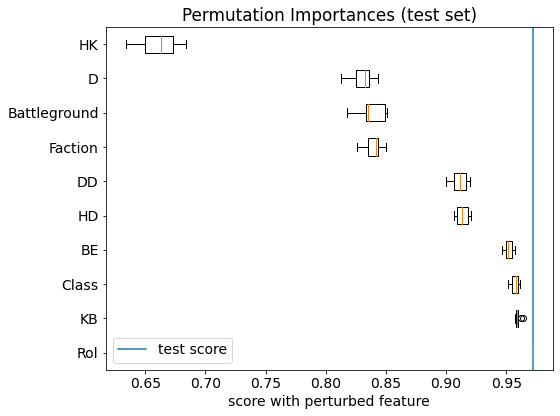

In [59]:
grid = xgb[np.argmax(xgb_test_scores)]
feature_importance(grid, xgb_X_test, xgb_y_test)

In [60]:
feature_weight = grid.best_estimator_.steps[-1][-1].get_booster().get_score(fmap='', importance_type='weight')
feature_total_gain = grid.best_estimator_.steps[-1][-1].get_booster().get_score(fmap='', importance_type='total_gain')
feature_total_cover = grid.best_estimator_.steps[-1][-1].get_booster().get_score(fmap='', importance_type='total_cover')
feature_weight = dict(sorted(feature_weight.items(), key=lambda item: item[1], reverse = True))
feature_total_gain = dict(sorted(feature_total_gain.items(), key=lambda item: item[1], reverse = True))
feature_total_cover = dict(sorted(feature_total_cover.items(), key=lambda item: item[1], reverse = True))

In [61]:
feature_weight

{'f4': 3250,
 'f3': 3203,
 'f2': 2443,
 'f0': 1169,
 'f1': 1073,
 'f15': 452,
 'f14': 399,
 'f31': 384,
 'f7': 265,
 'f11': 243,
 'f13': 213,
 'f9': 170,
 'f28': 133,
 'f19': 105,
 'f12': 103,
 'f6': 101,
 'f18': 101,
 'f21': 97,
 'f26': 92,
 'f24': 89,
 'f20': 82,
 'f25': 73,
 'f10': 66,
 'f22': 63,
 'f27': 48,
 'f23': 42,
 'f17': 35,
 'f29': 17,
 'f8': 15}

In [62]:
feature_total_gain

{'f2': 6508.819248017906,
 'f1': 2521.291136807194,
 'f4': 2308.864807756709,
 'f3': 2290.8405396505173,
 'f15': 1522.4955524672998,
 'f0': 795.1841981242522,
 'f14': 660.9457777777096,
 'f13': 573.7270718268,
 'f31': 464.08757705805965,
 'f7': 447.76983597160034,
 'f11': 405.03379602155985,
 'f9': 236.78315047570015,
 'f12': 202.60592487679992,
 'f6': 140.5531894302,
 'f10': 128.68183742699998,
 'f28': 109.3537931177,
 'f26': 101.57853418160006,
 'f19': 92.59891322465002,
 'f18': 89.44172235392996,
 'f21': 79.31049005469998,
 'f24': 70.07014252380004,
 'f20': 56.503040271300016,
 'f22': 47.86769354839998,
 'f25': 47.81658320014999,
 'f27': 33.878690707400004,
 'f23': 30.402220500999995,
 'f17': 16.109706633530003,
 'f8': 14.536113357,
 'f29': 11.0941623789}

In [63]:
feature_total_cover

{'f2': 73357.74379587994,
 'f4': 50973.49717145995,
 'f3': 42161.72277508007,
 'f1': 38370.755420380025,
 'f15': 18425.078745059986,
 'f0': 13432.125494849988,
 'f13': 9362.308767980003,
 'f14': 8880.334698859997,
 'f7': 5578.694060499999,
 'f31': 5039.382778169995,
 'f10': 4804.269771579999,
 'f12': 4650.26527267,
 'f11': 4595.524055710002,
 'f9': 4347.447664839999,
 'f28': 3141.09585223,
 'f18': 2236.34348946,
 'f26': 2211.34477465,
 'f6': 1953.1952405299996,
 'f21': 1773.38110597,
 'f24': 1677.1288548100015,
 'f19': 1427.5068773400005,
 'f25': 1311.6004866899998,
 'f23': 1262.0764268800003,
 'f20': 1090.9129163399998,
 'f22': 1049.7199356400001,
 'f17': 740.42578467,
 'f8': 711.53219813,
 'f27': 635.1236953800002,
 'f29': 178.46361281}

In [64]:
print(new_features[2])
print(new_features[4])
print(new_features[3])

HK
HD
DD


In [65]:
print(new_features[29])

Rol_dps


### SHAP Values

In [66]:
grid = xgb[np.argmax(xgb_test_scores)]

In [67]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(xgb_X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:50])
print(np.shape(shap_values))

(746, 33)
(50, 33)


In [68]:
shap_values

array([[ 1.80604503e-01,  1.66605759e+00,  1.38621628e+00, ...,
         0.00000000e+00,  2.13314574e-02,  0.00000000e+00],
       [ 2.80013442e-01,  8.37792277e-01, -6.68279767e-01, ...,
         0.00000000e+00, -3.12964544e-02,  0.00000000e+00],
       [ 2.68914104e-01,  1.70648694e+00, -9.63856399e-01, ...,
         0.00000000e+00, -1.71317405e-03,  0.00000000e+00],
       ...,
       [-7.27987215e-02, -2.13676643e+00,  1.78809369e+00, ...,
         0.00000000e+00, -5.34590334e-02,  0.00000000e+00],
       [-2.25892160e-02, -2.56392956e+00,  1.05140515e-01, ...,
         0.00000000e+00, -2.07672156e-02,  0.00000000e+00],
       [-8.02606106e-01,  2.61321515e-01, -3.81395006e+00, ...,
         0.00000000e+00, -1.31501183e-02,  0.00000000e+00]], dtype=float32)